In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



2022-11-01 14:36:44.589810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 14:36:44.771420: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-01 14:36:45.626329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-01 14:36:45.626419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

<module 'keras.api._v2.keras.datasets.mnist' from '/home/tech-support/.local/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


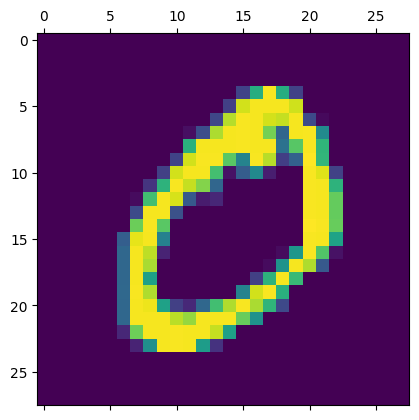

In [3]:
plt.matshow(x_train[1])
print(mnist)

In [4]:
x_train =x_train/255
x_test=x_test/255

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
                        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-11-01 14:36:47.654621: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-01 14:36:47.654662: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (turing-machine): /proc/driver/nvidia/version does not exist
2022-11-01 14:36:47.655086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10


2022-11-01 14:36:47.896497: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 2ms/step - loss: 0.6578 - accuracy: 0.8381 - val_loss: 0.3564 - val_accuracy: 0.9041
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.9067 - val_loss: 0.2906 - val_accuracy: 0.9188
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2856 - accuracy: 0.9193 - val_loss: 0.2581 - val_accuracy: 0.9281
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2554 - accuracy: 0.9280 - val_loss: 0.2370 - val_accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2325 - accuracy: 0.9347 - val_loss: 0.2166 - val_accuracy: 0.9391
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2137 - accuracy: 0.9398 - val_loss: 0.2031 - val_accuracy: 0.9412
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1981 - accuracy: 0.9444 - val_loss: 0.1889 - val_accuracy: 0.9453
Epo

In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9540
Loss=0.162
Accuracy=0.954


313/313 [==============================] - 0s 862us/step
The handwritten number is 5


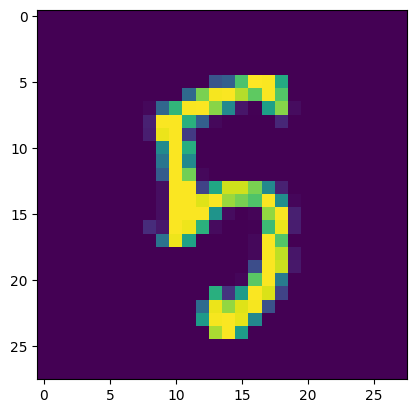

In [10]:
import random
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show
prediction=model.predict(x_test)
print("The handwritten number is %d" % np.argmax(prediction[n]))

In [11]:
test_predict=model.predict(x_test)

test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('Confusion Matrix of the test:\n', confusion_matrix)

313/313 [==============================] - 0s 927us/step
Confusion Matrix of the test:
 tf.Tensor(
[[ 969    0    1    1    0    3    4    1    1    0]
 [   0 1116    3    2    0    1    4    2    7    0]
 [   6    1  987    6    6    2    4   10   10    0]
 [   0    0    9  961    0   10    0   10   17    3]
 [   2    1    8    0  934    0    9    3    4   21]
 [  10    1    1   21    2  832   10    1    9    5]
 [   9    3    3    0    5    8  925    2    3    0]
 [   3    8   24    4    3    1    0  966    2   17]
 [   4    1    5   10    5    8    9    8  923    1]
 [   9    8    2   11   26    5    1   11    9  927]], shape=(10, 10), dtype=int32)
